In [1]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from stfe.gene_utils import get_markers
import scanpy as sc
from plotly3d.plot import trajectories
from sklearn.cluster import KMeans
import pandas as pd
import pathlib
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
adata = sc.read_h5ad('../data/rna_figure_ready.h5ad')

In [3]:
output_dir = '../results_final_Jan15/'
pathlib.Path(output_dir).mkdir(exist_ok=True)

In [4]:
gene_names = adata.var_names.to_numpy()

In [5]:
traj = np.load(f"../results_final_Dec22/traj_gene_space_T_extreme.npy", allow_pickle=True)

# sc.pp.highly_variable_genes(adata, n_top_genes=400)
alex_genes = open('../data/alex_genes.txt').read().splitlines()
alex_tfs = open('../data/alex_tfs.txt').read().splitlines()

alex_gene_all = list(set(alex_genes) | set(alex_tfs))
alex_gene_all_mask = np.isin(adata.var_names, alex_gene_all)
traj = traj[:, :, alex_gene_all_mask]
gene_names = adata.var_names[alex_gene_all_mask]

In [6]:
traj_mean = traj.mean(axis=1)
traj_std = traj.std(axis=1)
traj_mean_std = traj_mean.std(axis=0)
zero_std_genes = traj_mean_std == 0
gene_names = np.array(gene_names)[~zero_std_genes]
traj, traj_mean, traj_std, traj_mean_std = traj[..., ~zero_std_genes], traj_mean[..., ~zero_std_genes], traj_std[..., ~zero_std_genes], traj_mean_std[..., ~zero_std_genes]
# traj_mean_normalized = (traj_mean - traj_mean.mean(axis=0)) / traj_mean.std(axis=0)
traj_mean_normalized = (traj_mean - traj_mean.min(axis=0)) / (traj_mean.max(axis=0) - traj_mean.min(axis=0))

In [7]:
trends_df = pd.DataFrame(traj_mean_normalized, columns=gene_names, index=[f't{i}' for i in range(traj_mean_normalized.shape[0])]).T


In [8]:
# Get the indices of top 5 values for each row
top_5_indices = trends_df.apply(lambda x: np.where(x >= sorted(x)[-10])[0].mean(), axis=1)
# Sort the dataframe by mean of top 5 indices
trends_df_sorted = trends_df.iloc[top_5_indices.argsort()]
trends_df_sorted

t0        t1        t2        t3        t4        t5        t6  \
TSC22D2  0.992839  0.994952  0.997797  1.000000  0.999397  0.995183  0.988097   
NPW      0.999537  1.000000  0.998140  0.994430  0.989854  0.984220  0.977315   
HCFC1R1  1.000000  0.981203  0.962673  0.944272  0.923947  0.901680  0.876444   
ACTR3    0.974574  0.978643  0.984808  0.992474  0.997880  1.000000  0.997989   
DDX18    0.951352  0.965927  0.978922  0.989669  0.996985  1.000000  0.998389   
...           ...       ...       ...       ...       ...       ...       ...   
AHDC1    0.719294  0.694064  0.668915  0.645509  0.624247  0.604871  0.586163   
TMEM59   0.001640  0.000155  0.000000  0.001340  0.003774  0.007441  0.011701   
RTCB     0.417900  0.453173  0.488870  0.524859  0.558567  0.588747  0.615354   
MT-ATP6  0.775261  0.740617  0.704457  0.667769  0.629687  0.589235  0.545340   
TFEB     0.243972  0.233075  0.221496  0.210502  0.201223  0.193702  0.187456   

               t7        t8        t9  ...       t90       t91       t92  \
TSC22D2  0.979771  0.968635  0.955491  ...  0.133973  0.135965  0.135857   
NPW      0.971372  0.963153  0.952944  ...  0.476282  0.474260  0.464187   
HCFC1R1  0.850814  0.822508  0.790394  ...  0.355385  0.357133  0.356680   
ACTR3    0.991008  0.977669  0.957855  ...  0.293342  0.306023  0.315589   
DDX18    0.991776  0.976928  0.956584  ...  0.401167  0.413014  0.419099   
...           ...       ...       ...  ...       ...       ...       ...   
AHDC1    0.571130  0.558481  0.546726  ...  0.981013  0.983663  0.986025   
TMEM59   0.015177  0.019273  0.022978  ...  0.776345  0.794962  0.818823   
RTCB     0.633754  0.645878  0.652232  ...  0.891911  0.923881  0.955473   
MT-ATP6  0.505296  0.465780  0.428103  ...  0.921372  0.928128  0.934441   
TFEB     0.182754  0.179350  0.177069  ...  0.966065  0.971986  0.978914   

              t93       t94       t95       t96       t97       t98       t99  
TSC22D2  0.134967  0.131519  0.126388  0.122134  0.118401  0.119236  0.122415  
NPW      0.450159  0.429588  0.401401  0.367587  0.332062  0.297278  0.263652  
HCFC1R1  0.357008  0.355876  0.353089  0.354306  0.358380  0.368460  0.379886  
ACTR3    0.317869  0.312671  0.299150  0.279626  0.254452  0.223144  0.187601  
DDX18    0.420518  0.415567  0.406594  0.393350  0.375334  0.351415  0.326228  
...           ...       ...       ...       ...       ...       ...       ...  
AHDC1    0.991344  0.996763  1.000000  0.999775  0.999294  0.996046  0.988697  
TMEM59   0.843992  0.872040  0.901676  0.931132  0.959019  0.981608  1.000000  
RTCB     0.977585  0.991769  1.000000  0.997044  0.982762  0.950035  0.909859  
MT-ATP6  0.946418  0.959285  0.971548  0.980778  0.989718  0.995334  1.000000  
TFEB     0.987454  0.995108  1.000000  0.999860  0.996936  0.987399  0.973215  

[2226 rows x 100 columns]

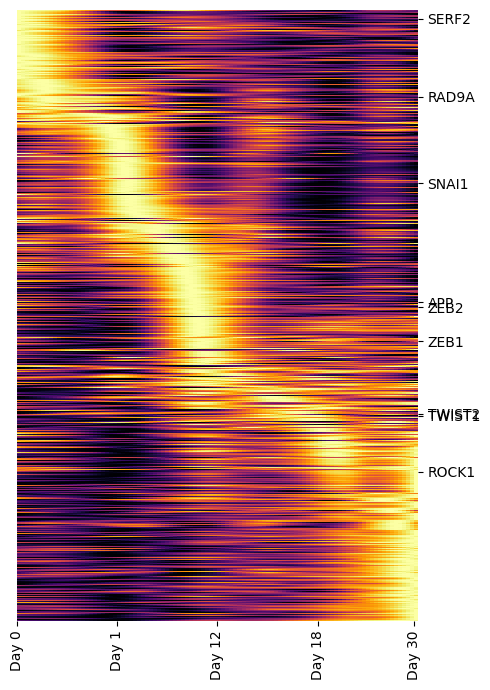

In [9]:
plt.figure(figsize=(5, 7))
# Create heatmap with selected y-ticks
ytick_genes = ['ROCK1', 'APP', 'RAD9A', 'SERF2', 'ZEB1', 'ZEB2', 'TWIST1', 'TWIST2', 'SNAI1', 'SNAI2', 'EPCAM']
# ytick_genes = ['ESRRA', 'ZEB1', 'ARNT', 'SNAI1', 'SNAI2', 'ATF3']
# ytick_genes = ['ROCK1', 'APP', 'RAD9A', 'SERF2', 'RPL6']
ytick_positions = [trends_df_sorted.index.get_loc(gene) for gene in ytick_genes if gene in trends_df_sorted.index]
ytick_labels = [ytick_genes[i] for i,pos in enumerate(ytick_positions)]

# Create heatmap with y-axis on the right
ax = sns.heatmap(trends_df_sorted, cmap='inferno', vmin=0, vmax=1,
                 cbar=False,
                 yticklabels=False)

# Move y-axis to the right and increase font size
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
plt.yticks(ytick_positions, ytick_labels)

# Customize x-ticks to show days  
days = [0, 1, 12, 18, 30]
tick_positions = [0, 25, 50, 75, 99]  # Evenly spaced positions
plt.xticks(tick_positions, [f'Day {d}' for d in days])

plt.tight_layout()

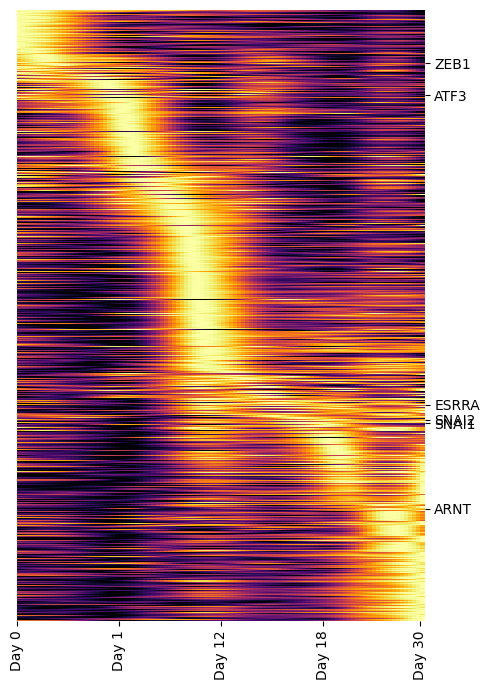

In [10]:
traj = np.load(f"../results_final_Dec22/traj_gene_space_T_extreme.npy", allow_pickle=True)

# sc.pp.highly_variable_genes(adata, n_top_genes=400)
# alex_genes = open('../data/alex_genes.txt').read().splitlines()
# alex_tfs = open('../data/alex_tfs.txt').read().splitlines()

# alex_gene_all = list(set(alex_genes) | set(alex_tfs))
# alex_gene_all_mask = np.isin(adata.var_names, alex_gene_all)
# traj = traj[:, :, alex_gene_all_mask]
gene_names = adata.var_names

traj_mean = traj.mean(axis=1)
traj_std = traj.std(axis=1)
traj_mean_std = traj_mean.std(axis=0)
zero_std_genes = traj_mean_std == 0
gene_names = np.array(gene_names)[~zero_std_genes]
traj, traj_mean, traj_std, traj_mean_std = traj[..., ~zero_std_genes], traj_mean[..., ~zero_std_genes], traj_std[..., ~zero_std_genes], traj_mean_std[..., ~zero_std_genes]
# traj_mean_normalized = (traj_mean - traj_mean.mean(axis=0)) / traj_mean.std(axis=0)
traj_mean_normalized = (traj_mean - traj_mean.min(axis=0)) / (traj_mean.max(axis=0) - traj_mean.min(axis=0))

trends_df = pd.DataFrame(traj_mean_normalized, columns=gene_names, index=[f't{i}' for i in range(traj_mean_normalized.shape[0])]).T

# Get the indices of top 5 values for each row
top_5_indices = trends_df.apply(lambda x: np.where(x >= sorted(x)[-10])[0].mean(), axis=1)
# Sort the dataframe by mean of top 5 indices
trends_df_sorted = trends_df.iloc[top_5_indices.argsort()]

plt.figure(figsize=(5, 7))
# Create heatmap with selected y-ticks
# ytick_genes = ['ROCK1', 'APP', 'RAD9A', 'SERF2', 'ZEB1', 'ZEB2', 'TWIST1', 'TWIST2', 'SNAI1', 'SNAI2', 'EPCAM']
# ytick_genes = ['ROCK1', 'APP', 'RAD9A', 'SERF2', 'RPL6']
ytick_genes = ['ESRRA', 'ZEB1', 'ARNT', 'SNAI1', 'SNAI2', 'ATF3']
ytick_positions = [trends_df_sorted.index.get_loc(gene) for gene in ytick_genes if gene in trends_df_sorted.index]
ytick_labels = [ytick_genes[i] for i,pos in enumerate(ytick_positions)]

# Create heatmap with y-axis on the right
ax = sns.heatmap(trends_df_sorted, cmap='inferno', vmin=0, vmax=1,
                 cbar=False,
                 yticklabels=False)

# Move y-axis to the right and increase font size
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
plt.yticks(ytick_positions, ytick_labels)

# Customize x-ticks to show days  
days = [0, 1, 12, 18, 30]
tick_positions = [0, 25, 50, 75, 99]  # Evenly spaced positions
plt.xticks(tick_positions, [f'Day {d}' for d in days])

plt.tight_layout()

plt.savefig(f'{output_dir}/heatmap_extreme_T.png', bbox_inches='tight', pad_inches=0.1)


<Axes: >

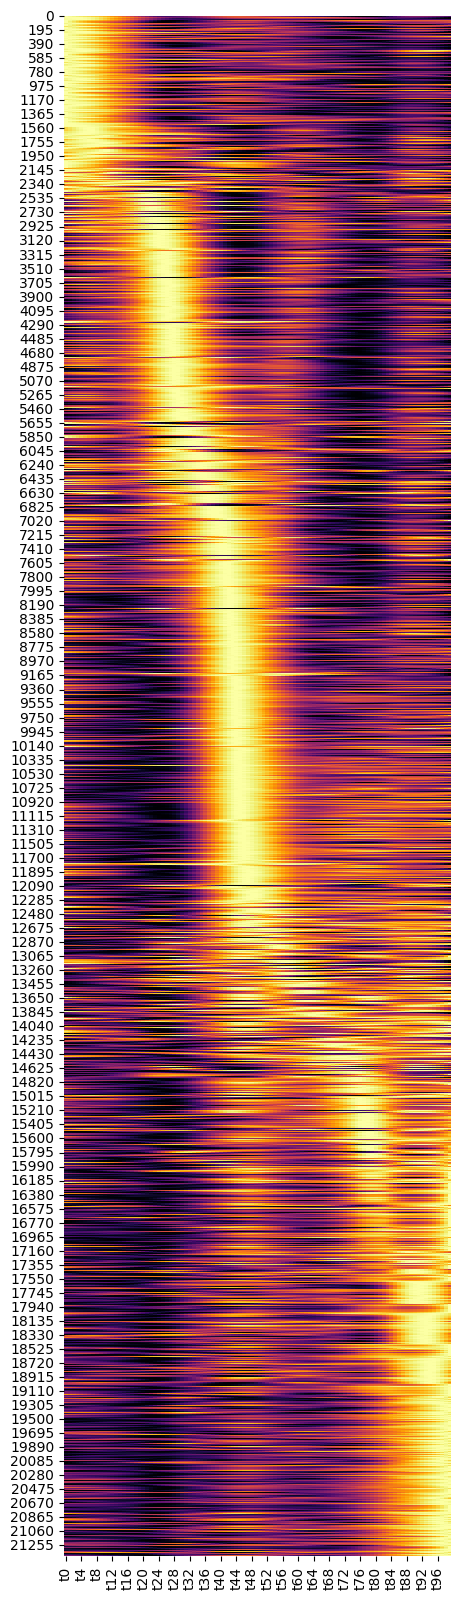

In [15]:
trends_df_sorted_numerical_index = trends_df_sorted.reset_index(drop=True)
plt.figure(figsize=(5, 20))
sns.heatmap(trends_df_sorted_numerical_index, cmap='inferno', vmin=0, vmax=1,
                 cbar=False)

In [16]:
# Split indices into 5 groups using the cluster points
cluster_pts = [2340, 6045, 12675, 17160]
cluster_groups = [
    trends_df_sorted.index[:cluster_pts[0]].tolist(),
    trends_df_sorted.index[cluster_pts[0]:cluster_pts[1]].tolist(),
    trends_df_sorted.index[cluster_pts[1]:cluster_pts[2]].tolist(), 
    trends_df_sorted.index[cluster_pts[2]:cluster_pts[3]].tolist(),
    trends_df_sorted.index[cluster_pts[3]:].tolist()
]

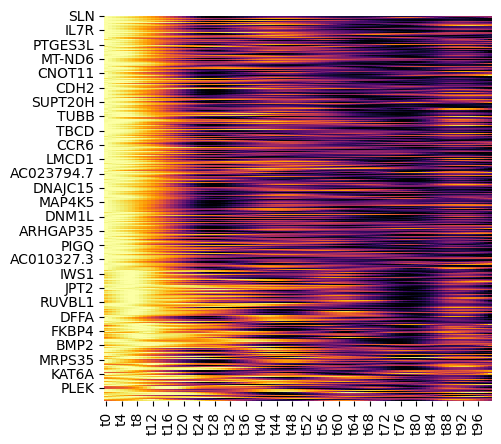

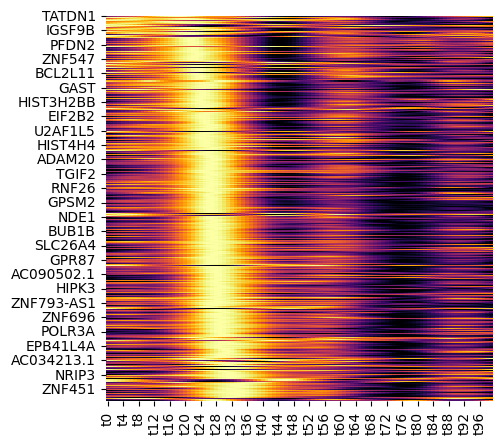

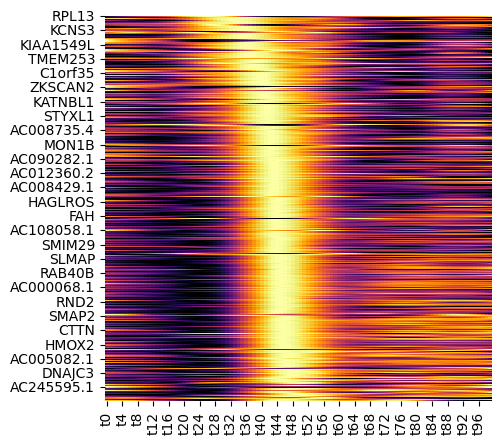

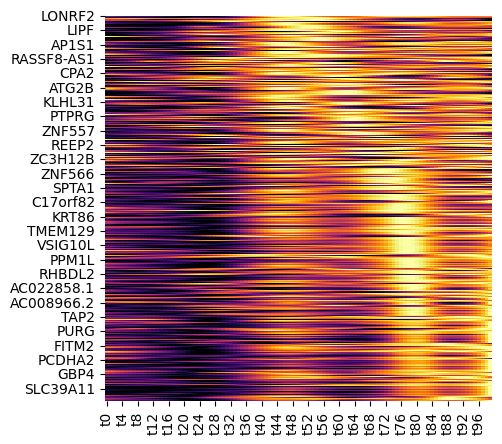

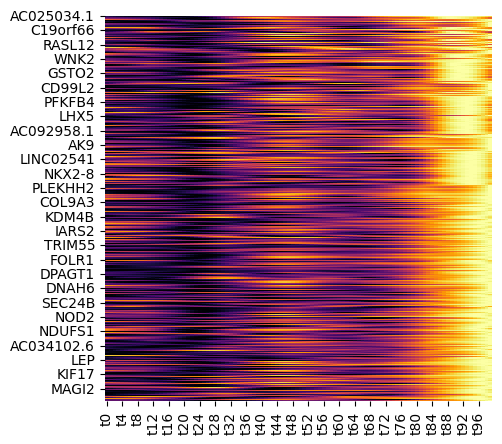

In [32]:
for trend_subset in cluster_groups:
    plt.figure(figsize=(5, 5))
    to_plot = trends_df_sorted.loc[trend_subset, :]
    sns.heatmap(to_plot, cmap='inferno', vmin=0, vmax=1,
                 cbar=False)

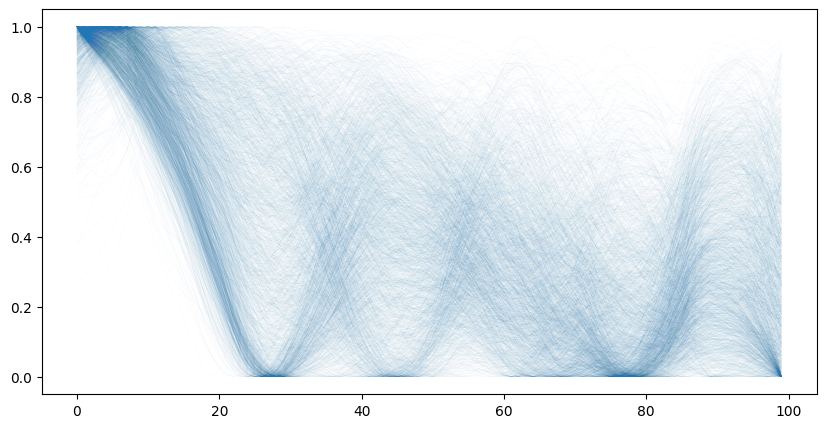

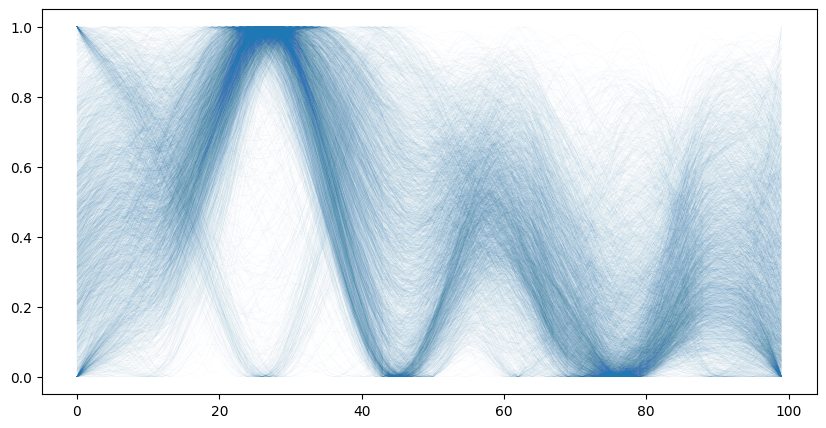

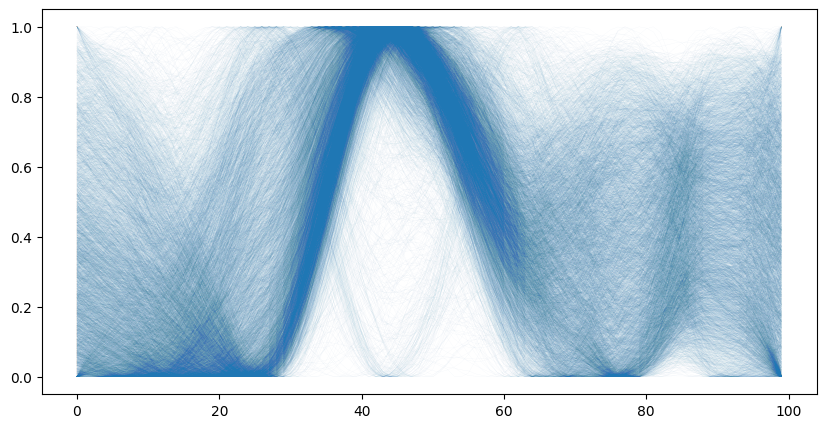

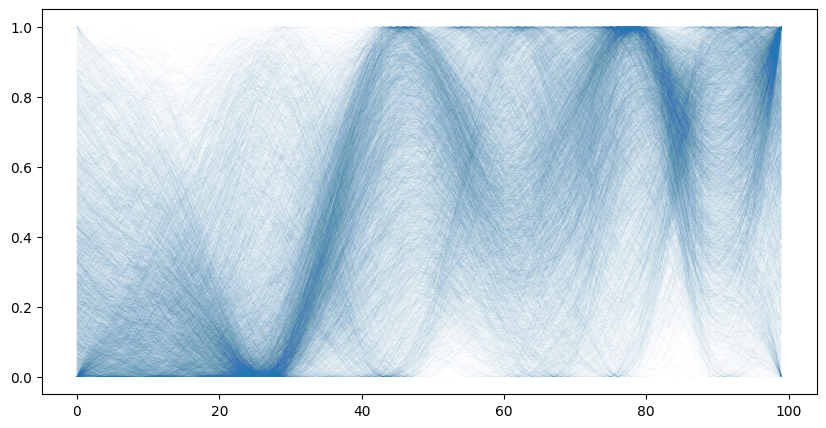

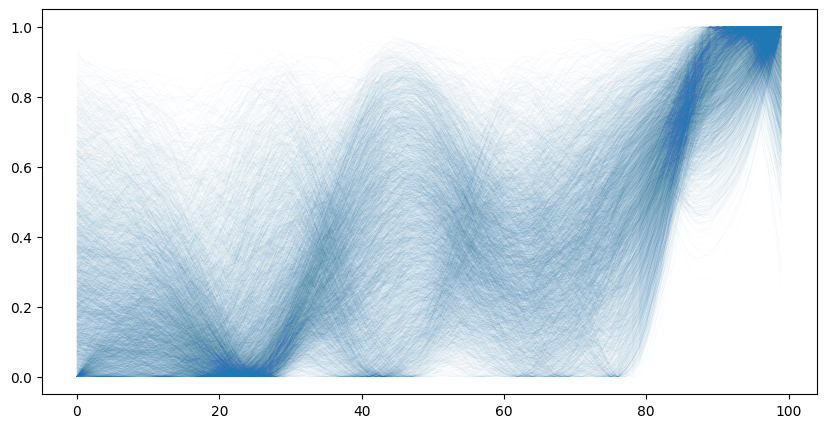

In [33]:
for trend_subset in cluster_groups:
    to_plot = trends_df_sorted.loc[trend_subset, :]
    # make plots using plt plot
    plt.figure(figsize=(10, 5))
    for row in to_plot.iterrows():
        plt.plot(row[1].values, color='#1f77b4', linewidth=0.1, alpha=0.1)  # Use consistent color for all lines
# plt.legend()
# plt.ylim(-2.5, 2.5)
# plt.savefig(f'{output_dir}/heatmap_extreme_T_cluster_0.png', bbox_inches='tight', pad_inches=0.1)

<Axes: >

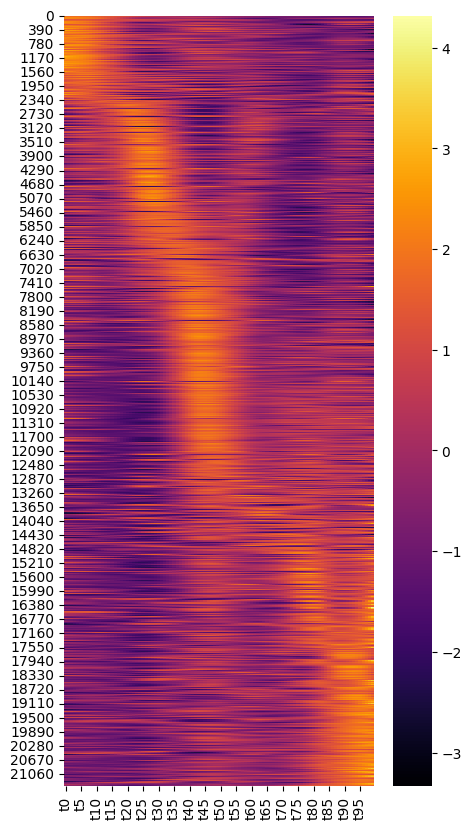

In [39]:
traj_mean_whiten = (traj_mean - traj_mean.mean(axis=0)) / traj_mean.std(axis=0)
trends_df_whiten = pd.DataFrame(traj_mean_whiten, columns=gene_names, index=[f't{i}' for i in range(traj_mean_whiten.shape[0])]).T

# Get the indices of top 5 values for each row
top_5_indices = trends_df_whiten.apply(lambda x: np.where(x >= sorted(x)[-10])[0].mean(), axis=1)
# Sort the dataframe by mean of top 5 indices
trends_df_whiten_sorted = trends_df_whiten.iloc[top_5_indices.argsort()]
trends_df_whiten_sorted

trends_df_whiten_sorted_numerical_index = trends_df_whiten_sorted.reset_index(drop=True)
plt.figure(figsize=(5, 10))
sns.heatmap(trends_df_whiten_sorted_numerical_index, cmap='inferno',
                 )

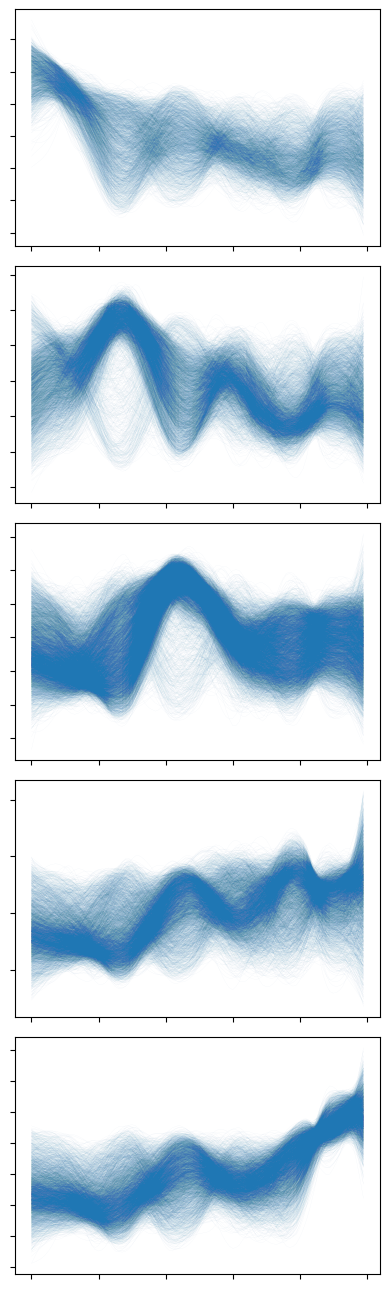

In [47]:
fig, axs = plt.subplots(5, 1, figsize=(4, 13))
for i, trend_subset in enumerate(cluster_groups):
    to_plot = trends_df_whiten_sorted.loc[trend_subset, :]
    # make plots using plt plot
    for row in to_plot.iterrows():
        axs[i].plot(row[1].values, color='#1f77b4', linewidth=0.1, alpha=0.1)
    axs[i].set_xticklabels([])
    axs[i].set_yticklabels([])
plt.tight_layout()
plt.savefig(f'{output_dir}/plot_cluster_extreme_T_whiten.png', bbox_inches='tight', pad_inches=0.1, dpi=300)

In [12]:
assert False

AssertionError: 

In [17]:
km = KMeans(random_state=42, n_clusters=5)
km.fit(trends_df)
cluster_labels = km.labels_
start_vals = [km.cluster_centers_[i][0] for i in range(km.n_clusters)]
sorted_indices = np.argsort(start_vals)[::-1]  # Sort indices in descending order
reorder_map = {old_label: new_label for new_label, old_label in enumerate(sorted_indices)}
reordered_labels = np.array([reorder_map[label] for label in cluster_labels])
cluster_labels = reordered_labels + 1

/gpfs/gibbs/pi/krishnaswamy_smita/xingzhi/.conda_envs/mioflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(-2.5, 2.5)

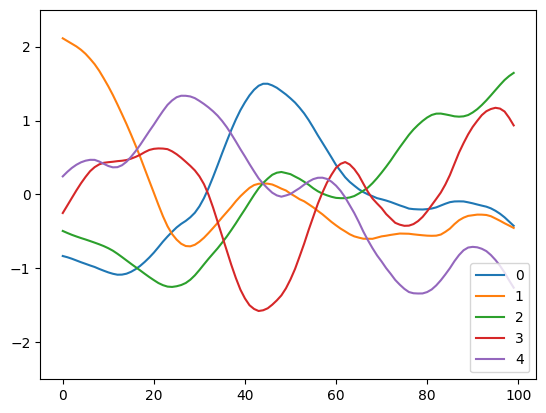

In [18]:
for i in range(len(np.unique(km.labels_))):
    plt.plot(km.cluster_centers_[i], label=i)
plt.legend()
plt.ylim(-2.5, 2.5)

In [19]:
# Use the predefined tab20 colormap
import matplotlib.pyplot as plt

# Function to convert numbers to colors using tab20 colormap
def lut(number):
    cmap = plt.get_cmap('tab20')
    return cmap(number / 20)  # Normalize the input to [0, 1]

In [20]:
row_colors = pd.Series(km.labels_, index=trends_df.index).apply(lut).rename("Cluster")


In [21]:
results_dir = pathlib.Path('../results_final_Dec22/cluster_heatmaps_extreme_T/')
results_dir.mkdir(exist_ok=True)

np.random.seed(23)

# Sort the DataFrame by cluster labels
sorted_df = trends_df.iloc[np.argsort(cluster_labels)]
sorted_row_colors = row_colors.iloc[np.argsort(cluster_labels)]
sorted_cluster_labels = cluster_labels[np.argsort(cluster_labels)]

# Save the data frames
sorted_df.to_csv(results_dir / f'sorted_df.csv')
pd.DataFrame(sorted_row_colors).to_csv(results_dir / f'sorted_row_colors.csv')
pd.DataFrame({'cluster_labels': sorted_cluster_labels}, index=sorted_df.index).to_csv(results_dir / f'sorted_cluster_labels.csv')


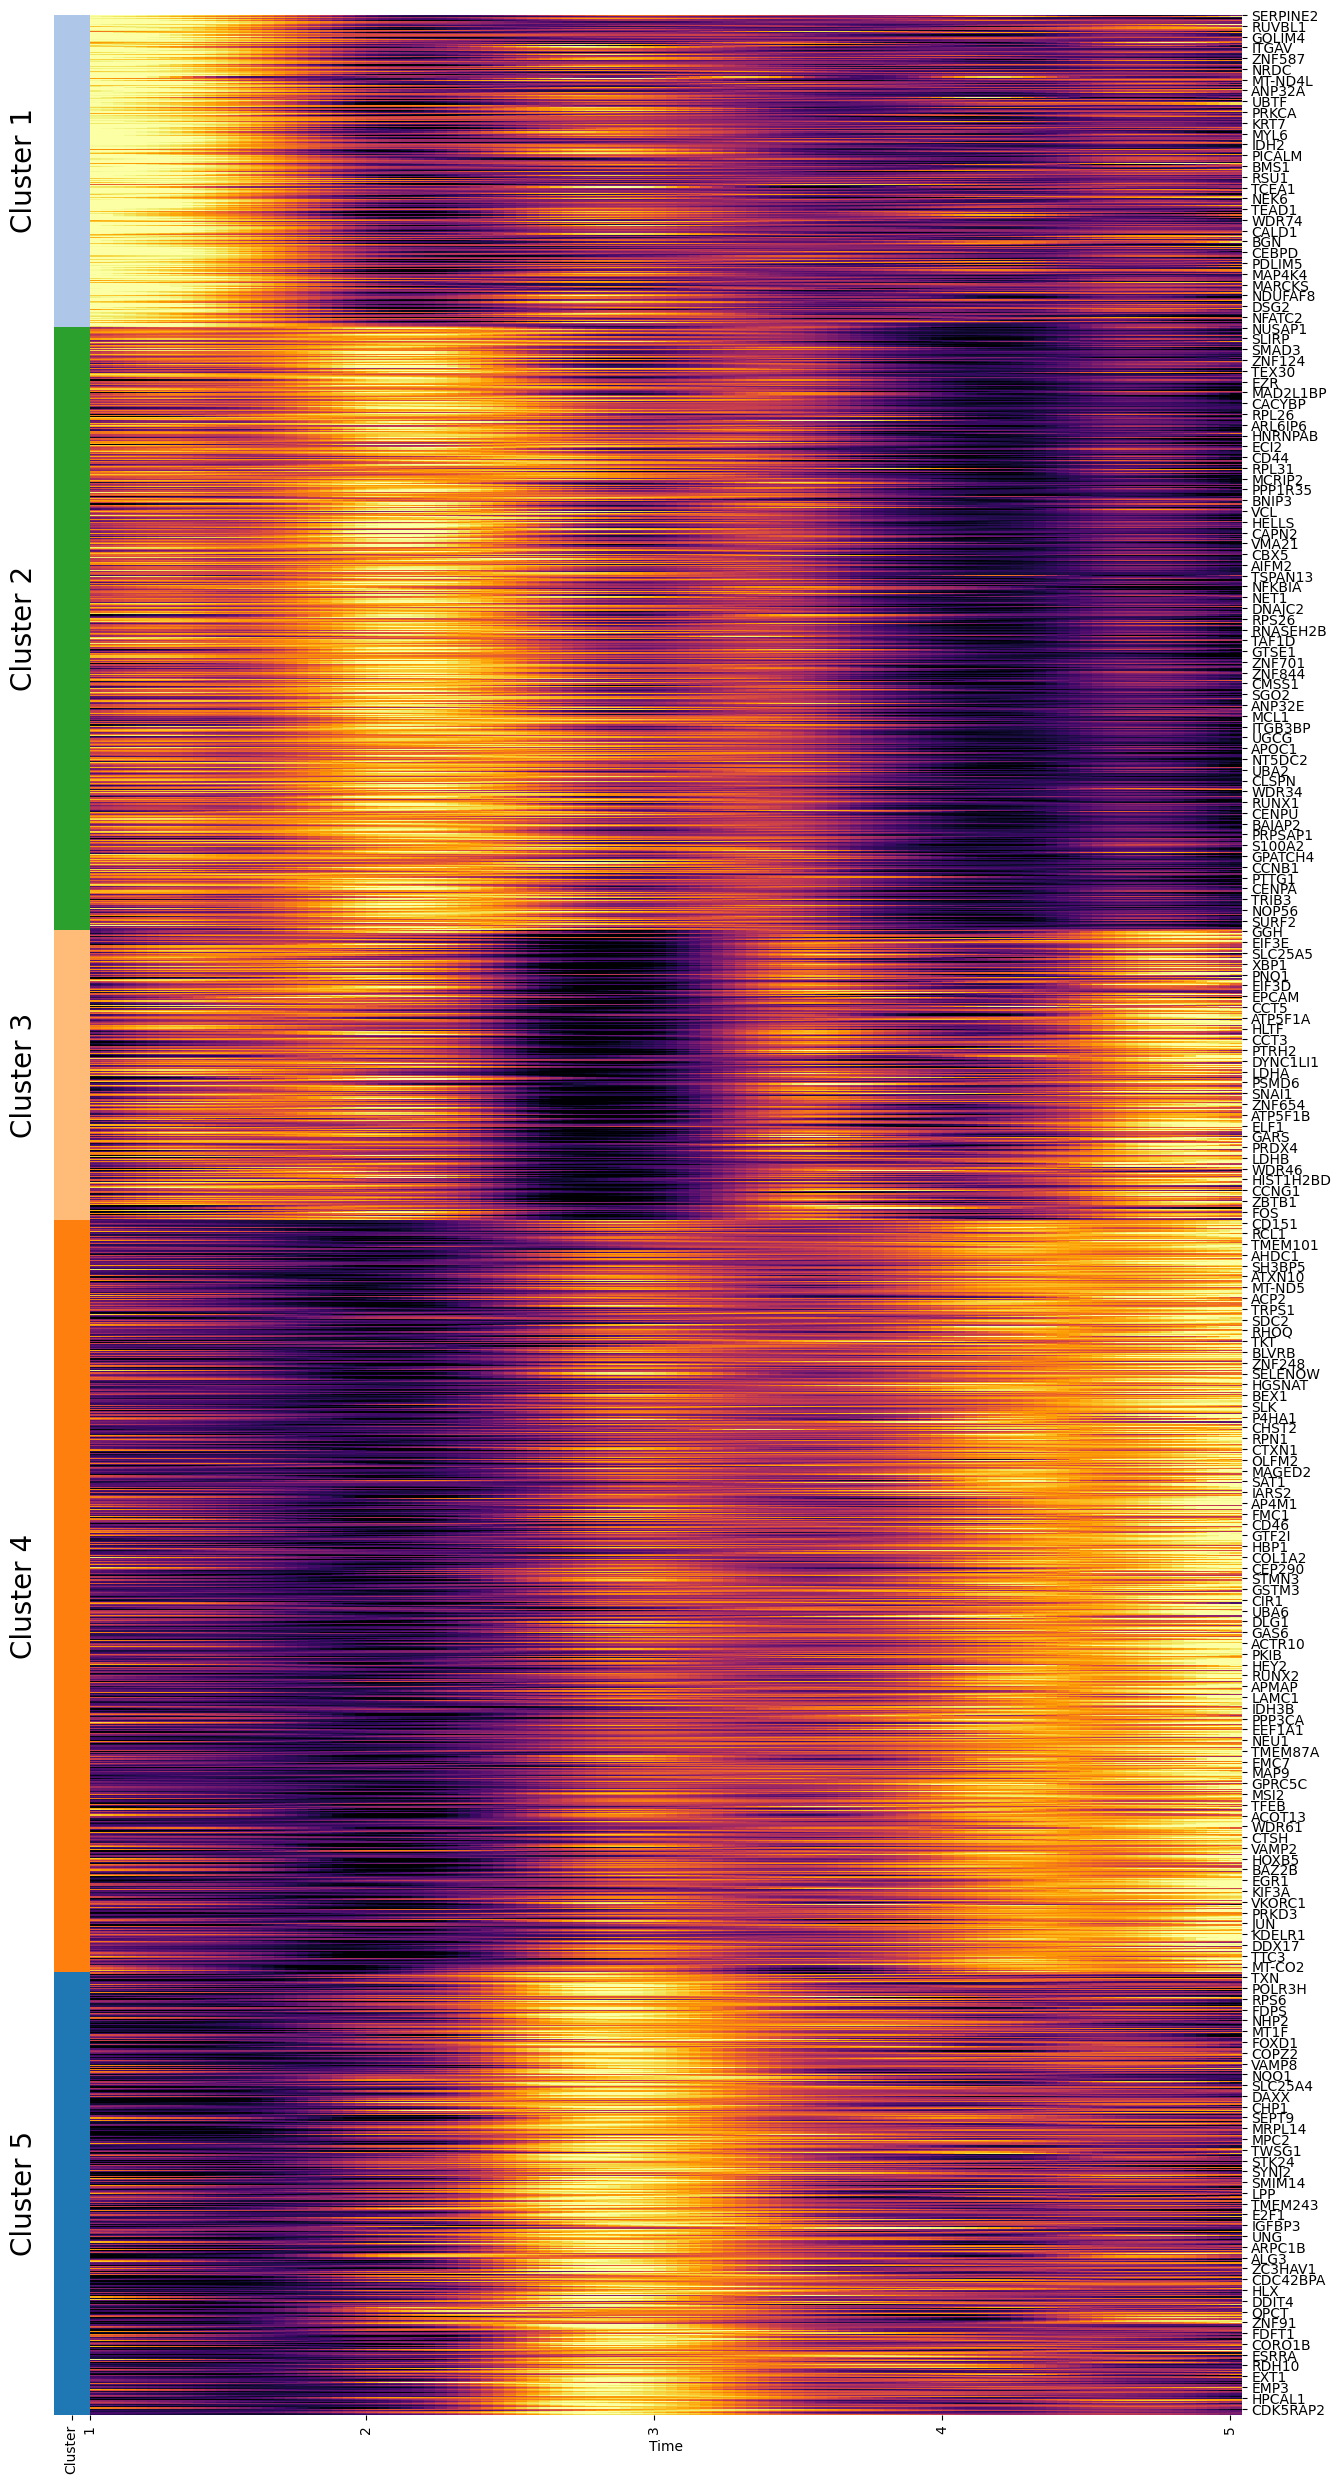

In [22]:
cl = sns.clustermap(
    sorted_df, col_cluster=False, cmap="inferno", robust=True, row_colors=sorted_row_colors,
    row_cluster=False,  # Disable row clustering to maintain the order
    cbar_pos=None,  # Remove the colorbar
    figsize=(12, 24)  # Adjust figure size for better layout
)
ax = cl.ax_heatmap
ax.set_xticks([0, 24, 49, 74, 99])
ax.set_xticklabels(np.arange(5) + 1)
names = sorted_df.index

# Set y-ticks to show one label every 100 genes
y_tick_positions = np.arange(0, len(names), 10)
ax.set_yticks(y_tick_positions)
ax.set_yticklabels(names[y_tick_positions])

ax.set_xlabel("Time")

# Adjust layout to remove extra margins
plt.tight_layout()

# Adjust the position of the main axes to fill the figure
cl.ax_heatmap.set_position([0.04, 0, 0.96, 1])

# Adjust the position of the row colors to align with the main heatmap
cl.ax_row_colors.set_position([0.01, 0, 0.03, 1])

# Add cluster labels to the left of the color blocks
ax_cluster_labels = cl.fig.add_axes([0, 0, 0.01, 1])
ax_cluster_labels.set_axis_off()

unique_labels = np.unique(sorted_cluster_labels)
for label in unique_labels:
    label_positions = np.where(sorted_cluster_labels == label)[0]
    mid_position = 1 - (label_positions[0] + label_positions[-1]) / 2 / len(sorted_cluster_labels)
    ax_cluster_labels.text(-0.3, mid_position, f'Cluster {label}', 
                           ha='right', va='center', rotation=90, transform=ax_cluster_labels.transAxes, fontsize=20)

plt.savefig(results_dir / f'cluster_heatmap.png', bbox_inches='tight', pad_inches=0.1)


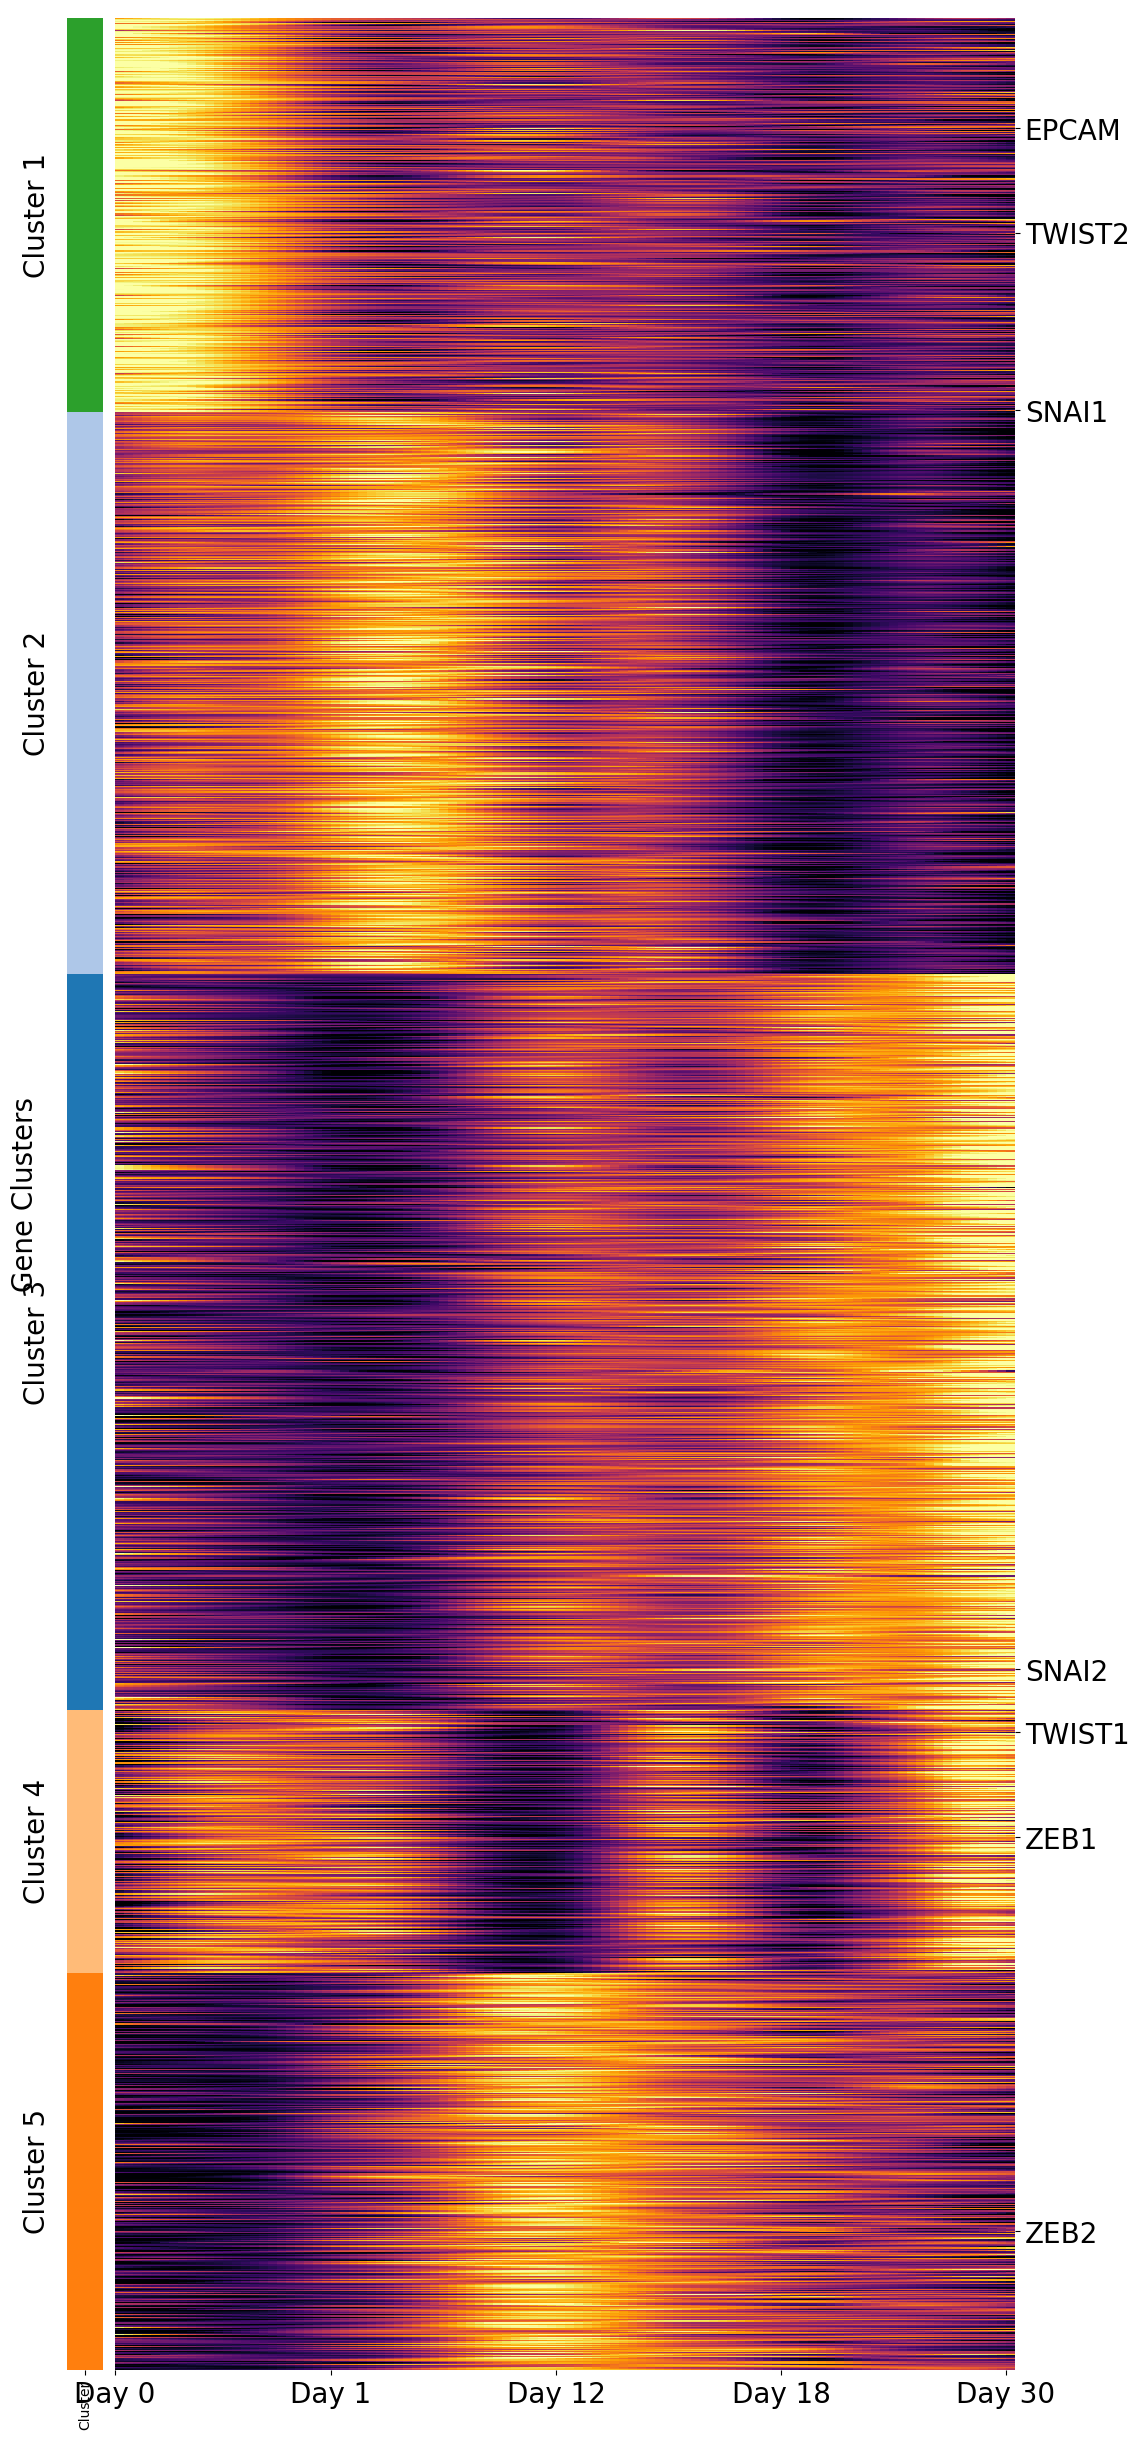

In [13]:
cl = sns.clustermap(
    sorted_df, col_cluster=False, cmap="inferno", robust=True, row_colors=sorted_row_colors,
    row_cluster=False,  # Disable row clustering to maintain the order
    cbar_pos=None,  # Remove the colorbar
    figsize=(12, 24)  # Adjust figure size for better layout
)

fontsize = 20

# Access heatmap axis
ax = cl.ax_heatmap

# Set x-ticks for time points
xticks_positions = [0, 24, 49, 74, 99]
xticks_labels = ["Day 0", "Day 1", "Day 12", "Day 18", "Day 30"]
ax.set_xticks(xticks_positions)
ax.set_xticklabels(xticks_labels, rotation=0, fontsize=fontsize)

# Highlight specific gene names on the right and remove others
highlighted_genes = ["EPCAM", "TWIST2", "SNAI1", "SNAI2", "TWIST1", "ZEB1", "ZEB2"]
highlighted_positions = [i for i, gene in enumerate(sorted_df.index) if gene in highlighted_genes]
ax.set_yticks(highlighted_positions)
ax.set_yticklabels(highlighted_genes, fontsize=fontsize)

# Adjust the position of the heatmap
cl.ax_heatmap.set_position([0.1, 0.01, 0.75, 0.98])  # Adjust for better alignment

# Adjust the position of the row colors
cl.ax_row_colors.set_position([0.06, 0.01, 0.03, 0.98])

# Add cluster labels to the left of the color blocks
ax_cluster_labels = cl.fig.add_axes([0.02, 0.01, 0.03, 0.98])  # Adjust position
ax_cluster_labels.set_axis_off()

# Add cluster labels
unique_labels = np.unique(sorted_cluster_labels)
for label in unique_labels:
    label_positions = np.where(sorted_cluster_labels == label)[0]
    mid_position = 1 - (label_positions[0] + label_positions[-1]) / 2 / len(sorted_cluster_labels)
    ax_cluster_labels.text(
        0.5, mid_position, f'Cluster {label}', 
        ha='center', va='center', rotation=90, transform=ax_cluster_labels.transAxes, fontsize=fontsize
    )

# Add "Gene Clusters" label to the left of the cluster labels
cl.fig.text(0.025, 0.5, "Gene Clusters", ha="center", va="center", rotation=90, fontsize=fontsize)

# Save the final figure
plt.savefig(results_dir / f'cluster_heatmap_fixed_layout.png', bbox_inches='tight', pad_inches=0.1)


In [14]:
cluster_df = pd.DataFrame({'cluster_labels': sorted_cluster_labels}, index=sorted_df.index)
gene_cluster_df = cluster_df.loc[alex_genes, :]
tf_cluster_df = cluster_df.loc[alex_tfs, :]
gene_cluster_df.to_csv(results_dir / f'gene_cluster_labels.csv')
tf_cluster_df.to_csv(results_dir / f'tf_cluster_labels.csv')